In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
#from datetime import datetime as dt
# finance module is no longer part of matplotlib
# run: pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc as candlestick
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num
import matplotlib.mlab as mlab
import datetime


### The following Python libraries are used
>*   numpy 1.14.3
*   pandas 0.23.0
*   matplotlib 2.2.2
*   seaborn 0.8.1
*   scipy 1.1.0
*   statsmodels 0.9.0
*   mpl_finance

### *** About the Data (bitstampUSD) ***
> 1. time_stamp (in unix time)
> 2. volume (BTC) - Volume of BTC transacted 
> 3. price (Currency)- Bitcoin price in Currency units 
> 4. data collected over 21 days starts from 28th September 2018 to 18th October 2018


<font color='black'>
###
====================================================================================================================== <br>
> ** Create tick, volume, and dollar bars. (Bar must have open, high, low, and close values.)  **
    
====================================================================================================================== 

In [3]:
def create_bar(dataframe, column_, units):
    _bars_ = dataframe.copy()
    #print(_bars_)
    if column_ == 'time_stamp':
        _bars_= _bars_.resample(str(units)+'T', label='right').agg({"price":'ohlc',"volume":'sum','transaction':'sum'})
        #print(_bars_)
        _bars_.columns = _bars_.columns.droplevel()
        #print(_bars_)
        _bars_['vwap'] = _bars_['transaction']/_bars_['volume']
        #print(_bars_)
    else:
        if column_ == 'id':
            _bars_[column_] =1
        #print(_bars_)
    
        _bars_['filter'] = _bars_[column_].cumsum()
        #print(_bars_)
        _bars_['group']= 0
        #print(_bars_)
        n = 0
        _bars_['filter'] = _bars_['filter']/units
        #print(_bars_)
        _bars_['filter'] = _bars_['filter'].astype(int)
        #print(_bars_)
        _bars_['group']= _bars_['filter']
        #print(_bars_)
        _bars_ = _bars_.groupby('group').agg({"time_stamp":"last","price":'ohlc',"volume":'sum','transaction':'sum'})
        #print(_bars_)
        
        _bars_.columns = _bars_.columns.droplevel()
        #print(_bars_)
        _bars_['vwap'] = _bars_['transaction']/_bars_['volume']
        #print(_bars_)
        _bars_ = _bars_.set_index('time_stamp')
        #print(_bars_)
    
    return _bars_

In [4]:
def PlotCandlesticks(r):
    candlesticks = zip(date2num(r.time_stamp),r['open'],r['high'],r['low'],r['close'],r['volume'])

    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1), (0,0))
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1 = fig.add_subplot(1,1,1)

    ax1.set_ylabel('Quote ($)', size=20)
    candlestick(ax1, candlesticks,width=.02,colorup='g', colordown='r')

    # shift y-limits of the candlestick plot so that there is space at the bottom for the volume bar chart
    pad = 0.25
    yl = ax1.get_ylim()
    ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])

    # format the x-ticks with a human-readable date. 
    xt = ax1.get_xticks()
    new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
    ax1.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    ax1.grid(True)
    plt.ion()
    plt.show()


In [5]:
path = os.getcwd()

In [6]:
data = pd.read_csv(path+'/bitstampUSD_21.csv')
data['transaction'] = data['price'] * data['volume']
data['time_stamp'] = pd.to_datetime(data['time_stamp'])
data.index = data['time_stamp']
data.head()

,time_stamp,price,volume,transaction
time_stamp,,,,
2018-07-28 00:00:06,2018-07-28 00:00:06,8177.72,0.046752,382.321576
2018-07-28 00:00:07,2018-07-28 00:00:07,8182.84,0.023810,194.830884
2018-07-28 00:00:16,2018-07-28 00:00:16,8182.84,0.013163,107.708268
2018-07-28 00:00:16,2018-07-28 00:00:16,8184.35,0.049576,405.750036
2018-07-28 00:00:16,2018-07-28 00:00:16,8184.36,0.047594,389.524302


In [7]:
dollar_bars = create_bar(data, 'transaction', 500000)
dollar_bars.to_csv(path+"/dollar_bars.csv")

In [8]:
datafile = path+"/dollar_bars.csv"
r = mlab.csv2rec(datafile, delimiter=',')
#PlotCandlesticks(r)
#print(r)


<font color='black'>
### 
====================================================================================================================== <br>
> **
======================================================================================================================

In [9]:
dollar_bars = create_bar(data, 'transaction', 500000)

#dollar_bars=dollar_bars.assign(dollar_returns=dollar_bars['close'].diff())
#add a column for the returns
dollar_returns_log=np.log(dollar_bars['close']).diff()
dollar_bars=dollar_bars.assign(dollar_returns_log=dollar_returns_log.values)
dollar_bars.head()

,open,high,low,close,volume,transaction,vwap,dollar_returns_log
time_stamp,,,,,,,,
2018-07-28 00:03:28,8177.72,8213.50,8177.72,8213.50,40.711876,334023.790328,8204.578676,NaN
2018-07-28 00:04:18,8216.74,8234.04,8209.89,8234.04,75.915168,624111.674154,8221.172292,0.002498
2018-07-28 00:04:49,8232.14,8238.87,8204.96,8221.93,65.823182,541553.725604,8227.401135,-0.001472
2018-07-28 00:25:48,8205.03,8217.18,8174.81,8180.20,61.068439,500125.822028,8189.595613,-0.005088
2018-07-28 01:08:04,8180.20,8183.49,8152.11,8161.53,58.297761,476165.522835,8167.818390,-0.002285


In [10]:

#add a column for the 20 period std deviation of the log of returns at each bar (volatility)
dollar_bars=dollar_bars.assign(periodVol=dollar_returns_log.ewm(span=20).std())
dollar_bars.head()

,open,high,low,close,volume,transaction,vwap,dollar_returns_log,periodVol
time_stamp,,,,,,,,,
2018-07-28 00:03:28,8177.72,8213.50,8177.72,8213.50,40.711876,334023.790328,8204.578676,NaN,NaN
2018-07-28 00:04:18,8216.74,8234.04,8209.89,8234.04,75.915168,624111.674154,8221.172292,0.002498,NaN
2018-07-28 00:04:49,8232.14,8238.87,8204.96,8221.93,65.823182,541553.725604,8227.401135,-0.001472,0.002807
2018-07-28 00:25:48,8205.03,8217.18,8174.81,8180.20,61.068439,500125.822028,8189.595613,-0.005088,0.003785
2018-07-28 01:08:04,8180.20,8183.49,8152.11,8161.53,58.297761,476165.522835,8167.818390,-0.002285,0.003032


### We define the target as 1 if price moves up more than periodVol value, -1 if price moves up more than periodVol value, and 0 otherwise

In [11]:

dollar_bars=dollar_bars.assign(Target=np.nan)
#create Target column with value 1 if price moves up more than periodVol value, -1 if price moves up more than periodVol value, 
# and 0 otherwise
move_up_bar=dollar_bars[dollar_bars.dollar_returns_log>dollar_bars.periodVol].replace({'Target': np.nan}, 1,inplace=False)
dollar_bars.update(move_up_bar)
move_down_bar=dollar_bars[((dollar_bars.dollar_returns_log*-1)>dollar_bars.periodVol)].replace({'Target': np.nan},-1,inplace=False)
dollar_bars.update(move_down_bar)
dollar_bars=dollar_bars.replace({'Target': np.nan}, 0)
dollar_bars.head()

,open,high,low,close,volume,transaction,vwap,dollar_returns_log,periodVol,Target
time_stamp,,,,,,,,,,
2018-07-28 00:03:28,8177.72,8213.50,8177.72,8213.50,40.711876,334023.790328,8204.578676,NaN,NaN,0.0
2018-07-28 00:04:18,8216.74,8234.04,8209.89,8234.04,75.915168,624111.674154,8221.172292,0.002498,NaN,0.0
2018-07-28 00:04:49,8232.14,8238.87,8204.96,8221.93,65.823182,541553.725604,8227.401135,-0.001472,0.002807,0.0
2018-07-28 00:25:48,8205.03,8217.18,8174.81,8180.20,61.068439,500125.822028,8189.595613,-0.005088,0.003785,-1.0
2018-07-28 01:08:04,8180.20,8183.49,8152.11,8161.53,58.297761,476165.522835,8167.818390,-0.002285,0.003032,0.0


### Adding technical indicators

In [12]:
#Exponential Moving Average  
def EMA(df, n):  
    
    EMA = pd.Series(df['close'].ewm(span=n).mean(), name = 'ema_' + str(n))  
    df = df.join(EMA)  
    return df

#Momentum  
def MOM(df, n):  
    M = pd.Series(df['close'].diff(n), name = 'momentum_' + str(n))  
    df = df.join(M)  
    return df

#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i  < df['close'].count()-1:
        UpMove = df['high'].iat[i + 1] - df['high'].iat[i]
        DoMove = df['low'].iat[i] - df['low'].iat[i + 1]  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI) 
    
    PosDI = pd.Series(UpI.ewm(span=n,min_periods = n - 1).mean())  
    NegDI = pd.Series(DoI.ewm(span=n,min_periods = n - 1).mean())  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'rsi_' + str(n))  *100
    df = df.assign(RSI=RSI.values)  
    
    return df


#Commodity Channel Index  
def CCI(df, n):  
    
    PP = (df['high'] + df['low'] + df['close']) / 3  
    
    r = PP.rolling(window=n)
    CCI = pd.Series((PP - r.mean()) / r.std(), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df

In [13]:
data = RSI(dollar_bars, 14)
data = MOM(data, 14)
data = CCI(data, 14)
data = EMA(data, 14)


In [14]:
data=data.dropna().drop_duplicates()
data.head()
all_data=data.copy()

In [15]:
all_data

,open,high,low,close,volume,transaction,vwap,dollar_returns_log,periodVol,Target,RSI,momentum_14,CCI_14,ema_14
time_stamp,,,,,,,,,,,,,,
2018-07-28 09:21:33,8174.58,8189.07,8166.00,8188.57,63.145093,516074.044190,8172.828994,0.002210,0.003263,0.0,48.377459,-24.93,-0.578647,8190.002021
2018-07-28 10:08:29,8182.28,8205.44,8174.19,8192.15,62.731287,513710.431875,8189.062515,0.000437,0.003056,0.0,57.858265,-41.89,0.085848,8190.320703
2018-07-28 10:52:15,8191.21,8205.84,8179.01,8190.00,60.208310,493108.631086,8190.042670,-0.000262,0.002863,0.0,58.075352,-31.93,0.366876,8190.273827
2018-07-28 11:10:14,8187.37,8189.01,8163.01,8171.79,54.829852,448175.258076,8173.927903,-0.002226,0.002780,0.0,46.919902,-8.41,-0.894949,8187.606343
2018-07-28 11:11:13,8163.00,8163.00,8132.03,8149.10,68.187699,555713.293727,8149.758765,-0.002780,0.002735,-1.0,32.830737,-12.43,-2.374816,8182.109680
2018-07-28 11:19:02,8149.09,8230.00,8134.80,8229.96,60.858826,498698.024629,8194.341821,0.009874,0.004283,1.0,61.602724,39.39,0.774658,8188.876467
2018-07-28 11:20:40,8230.00,8232.14,8201.99,8216.05,61.025868,501521.726971,8218.182618,-0.001692,0.004102,0.0,62.199463,48.05,1.604363,8192.688422
2018-07-28 11:39:33,8216.05,8221.63,8187.72,8195.31,61.346504,503533.413313,8208.021364,-0.002528,0.003976,0.0,55.556297,-0.97,0.647498,8193.053644
2018-07-28 11:44:04,8197.31,8201.17,8158.15,8185.00,60.007028,491023.692072,8182.769787,-0.001259,0.003776,0.0,44.255046,-20.00,-0.430890,8191.938330


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformed_data = pd.DataFrame(data,index = data.index,columns = {'CCI_14','ema_14','RSI','momentum_14','dollar_returns_log','periodVol'})
scaler_data = scaler.fit_transform(transformed_data)
scaler_data = pd.DataFrame(scaler_data, index = transformed_data.index, columns=transformed_data.columns)
scaler_data = scaler_data.assign(Target=data.Target)
scaler_data.head()

,CCI_14,RSI,momentum_14,ema_14,dollar_returns_log,periodVol,Target
time_stamp,,,,,,,
2018-07-28 09:21:33,-0.362995,0.180266,-0.107041,1.951097,0.755967,0.104802,0.0
2018-07-28 10:08:29,0.151314,0.632518,-0.314003,1.951562,0.174321,-0.143471,0.0
2018-07-28 10:52:15,0.368826,0.642873,-0.192462,1.951493,-0.055143,-0.374271,0.0
2018-07-28 11:10:14,-0.607808,0.110738,0.094552,1.947606,-0.699155,-0.473516,0.0
2018-07-28 11:11:13,-1.753203,-0.561342,0.045496,1.939597,-0.881055,-0.527487,-1.0


#### We will shift the values in the Target column up by 1 so that we are actually predicting if a bar is going to have a large move, i.e. Trading signal that is worth taking

In [17]:
#shift the values in the Target column up by 1 so that we are actually predicting if the next bar is going to have a large move
# i.e. A trading signal that is worth taking
scaler_data.Target=scaler_data.Target.shift(-1)
scaler_data = scaler_data[:-1]
scaler_data

,CCI_14,RSI,momentum_14,ema_14,dollar_returns_log,periodVol,Target
time_stamp,,,,,,,
2018-07-28 09:21:33,-0.362995,0.180266,-0.107041,1.951097,0.755967,0.104802,0.0
2018-07-28 10:08:29,0.151314,0.632518,-0.314003,1.951562,0.174321,-0.143471,0.0
2018-07-28 10:52:15,0.368826,0.642873,-0.192462,1.951493,-0.055143,-0.374271,0.0
2018-07-28 11:10:14,-0.607808,0.110738,0.094552,1.947606,-0.699155,-0.473516,-1.0
2018-07-28 11:11:13,-1.753203,-0.561342,0.045496,1.939597,-0.881055,-0.527487,1.0
2018-07-28 11:19:02,0.684442,0.811136,0.677855,1.949457,3.269537,1.328571,0.0
2018-07-28 11:20:40,1.326622,0.839601,0.783533,1.955012,-0.523896,1.111157,0.0
2018-07-28 11:39:33,0.586022,0.522710,0.185343,1.955544,-0.798081,0.960124,0.0
2018-07-28 11:44:04,-0.248633,-0.016381,-0.046880,1.953919,-0.381947,0.720099,0.0


In [18]:
#features = ['time_stamp','CCI_14','ema_14','RSI','momentum_14','dollar_returns_log','periodVol']
scaler_data=scaler_data.reset_index()
scaler_data=scaler_data.drop_duplicates('time_stamp', keep='first')
scaler_data=scaler_data.set_index('time_stamp')
scaler_data.index = pd.to_datetime(scaler_data.index)
# Separating out the features
x = scaler_data.drop(columns=['Target'])#.loc[:, features].values
#x = x.set_index('time_stamp')
# Separating out the target
y = scaler_data.loc[:,['Target']].values

#### We will use PCA to see if we can reduce the number of features

In [19]:
x

,CCI_14,RSI,momentum_14,ema_14,dollar_returns_log,periodVol
time_stamp,,,,,,
2018-07-28 09:21:33,-0.362995,0.180266,-0.107041,1.951097,0.755967,0.104802
2018-07-28 10:08:29,0.151314,0.632518,-0.314003,1.951562,0.174321,-0.143471
2018-07-28 10:52:15,0.368826,0.642873,-0.192462,1.951493,-0.055143,-0.374271
2018-07-28 11:10:14,-0.607808,0.110738,0.094552,1.947606,-0.699155,-0.473516
2018-07-28 11:11:13,-1.753203,-0.561342,0.045496,1.939597,-0.881055,-0.527487
2018-07-28 11:19:02,0.684442,0.811136,0.677855,1.949457,3.269537,1.328571
2018-07-28 11:20:40,1.326622,0.839601,0.783533,1.955012,-0.523896,1.111157
2018-07-28 11:39:33,0.586022,0.522710,0.185343,1.955544,-0.798081,0.960124
2018-07-28 11:44:04,-0.248633,-0.016381,-0.046880,1.953919,-0.381947,0.720099


In [20]:
from sklearn.decomposition import PCA
# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.298254,-1.244002
1,-0.177058,-1.429420
2,-0.133669,-1.594563
3,-0.994361,-1.338535
4,-2.024561,-1.040042


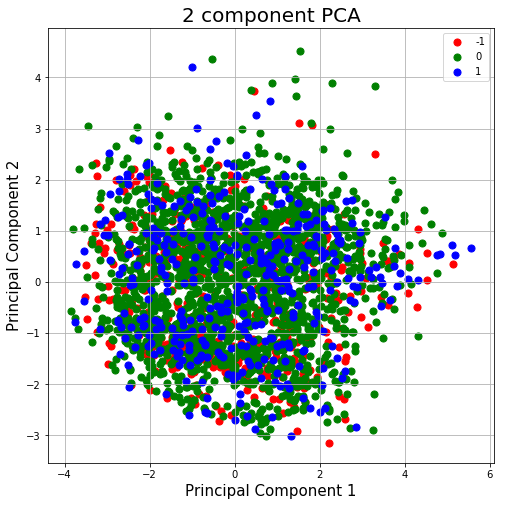

In [21]:
classesDf = pd.DataFrame(data = y, columns = ['Target'])

finalDf = pd.concat([principalDf, classesDf], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1,0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


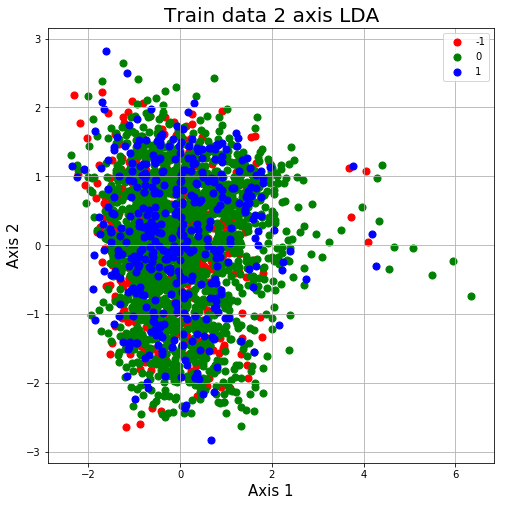

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
principalComponents = lda.fit_transform(x,y)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
classesDf = pd.DataFrame(data = y, columns = ['target'])
#print(classesDf)
#print(principalDf)
finalDf = pd.concat([principalDf, classesDf],axis=1)
#print(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Axis 1', fontsize = 15)
ax.set_ylabel('Axis 2', fontsize = 15)
ax.set_title('Train data 2 axis LDA', fontsize = 20)
targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


##### * Analysis: There is a lot of overlap in the data using PCA or LDA so we are not going to attempt feature reduction

#### Below we will try to train a model to predict the Target field value (1,0,-1) using a voting classifier that incorporates K-means, SVC and Random Forest learning

In [23]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from collections import Counter

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.25, random_state=42)

clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                        ('knn', neighbors.KNeighborsClassifier()),
                        ('rfor', RandomForestClassifier())])

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:', confidence)
predictions = clf.predict(X_test)
print('predicted class counts:', Counter(predictions))


accuracy: 0.6370716510903427
predicted class counts: Counter({0.0: 607, -1.0: 30, 1.0: 5})


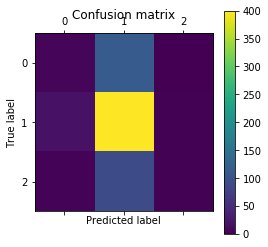

In [24]:
from sklearn.metrics import confusion_matrix
# Plot the confusion matrix.
cm = confusion_matrix(y_test, predictions)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Precision, Recall, F-Score

In [25]:
from sklearn.metrics import precision_recall_fscore_support
print('precision, recall, fscore')
print('macro', precision_recall_fscore_support(y_test, predictions, average='macro'))

print('micro',precision_recall_fscore_support(y_test, predictions, average='micro'))

print('weighted', precision_recall_fscore_support(y_test, predictions, average='weighted'))



precision, recall, fscore
macro (0.4863261943986821, 0.34258570191357784, 0.30487211501537764, None)
micro (0.6370716510903427, 0.6370716510903427, 0.6370716510903427, None)
weighted (0.5633784456522296, 0.6370716510903427, 0.5349111408466171, None)


### [To Do] AUC score

In [26]:
from sklearn.metrics import roc_auc_score
#roc_auc_score(y_true=y_test,y_score='TBD')

### [To Do] ROC curves

see doc at https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-pyq3d

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<font color='blue'>

   
    
> Analysis:
* 
------------------------------------------------------------------------------------------------------------

<font color='black'>

======================================================================================================================
 ### [To Do] Cross-validation
====================================================================================================================== 


In [27]:
len(predictions)


642

<font color='black'>

======================================================================================================================
 ### [To Do] Fund factsheet using Backtrader and PyFolio 
====================================================================================================================== 


In [28]:
#reload dollar bars data from csv file to use opne, low, high, close
data = pd.read_csv(datafile)
data=data.set_index('time_stamp')
data.index=pd.to_datetime(data.index)
#join with scaler_data then add Target column as predicted Y values from above
#print(len(X_test))
#X_test = pd.concat([X_test, data], axis=1, ignore_index=True)
data=data.loc[X_test.index.unique()].drop_duplicates()
data=data.reset_index().drop_duplicates('time_stamp')

data=data.set_index('time_stamp')
data.index=pd.to_datetime(data.index)

data=data.sort_index()
#print('x_t',len(X_test))
#print('preds',len(predictions))
#print('data',len(data.index))
data=data.assign(openinterest=predictions)
data

,open,high,low,close,volume,transaction,vwap,openinterest
time_stamp,,,,,,,,
2018-07-28 15:53:18,8089.51,8089.51,8067.82,8070.00,55.472836,448035.839012,8076.670854,0.0
2018-07-28 17:29:36,8158.46,8213.65,8157.76,8197.75,60.654905,497307.858259,8198.971842,0.0
2018-07-28 23:59:14,8163.50,8225.00,8163.17,8225.00,61.120575,500212.585469,8184.029411,0.0
2018-07-28 23:59:38,8225.00,8258.14,8225.00,8258.14,60.038367,495136.697059,8247.004706,0.0
2018-07-29 03:09:32,8238.77,8252.32,8231.22,8244.57,61.341376,505401.555579,8239.162358,0.0
2018-07-29 03:17:03,8235.83,8243.01,8232.94,8236.42,60.179672,495945.472126,8241.079743,0.0
2018-07-29 03:58:22,8216.51,8243.39,8216.51,8243.39,47.471240,390773.540148,8231.795467,0.0
2018-07-29 04:13:58,8243.00,8243.00,8218.76,8219.78,74.030396,609508.119476,8233.214342,0.0
2018-07-29 04:51:44,8207.50,8217.97,8193.48,8193.49,60.895469,499323.615395,8199.684232,0.0


#### backtest our trading system using Backtrader on the data set with Target values of 1 to buy and -1 to sell

Starting Portfolio Value: 50000.00
2018-07-28, Close, 8070.00
2018-07-28, Close, 8197.75
2018-07-28, Close, 8225.00
2018-07-28, Close, 8258.14
2018-07-29, Close, 8244.57
2018-07-29, Close, 8236.42
2018-07-29, Close, 8243.39
2018-07-29, Close, 8219.78
2018-07-29, Close, 8193.49
2018-07-29, Close, 8205.73
2018-07-29, Close, 8194.66
2018-07-29, SELL CREATE, 8194.66
2018-07-29, SELL EXECUTED, 8156.36
2018-07-29, Close, 8150.01
2018-07-29, Close, 8134.11
2018-07-29, Close, 8117.01
2018-07-29, Close, 8185.99
2018-07-29, Close, 8196.99
2018-07-29, Close, 8208.37
2018-07-29, Close, 8261.65
2018-07-30, Close, 8191.62
2018-07-30, Close, 8144.30
2018-07-30, Close, 8090.87
2018-07-30, Close, 8170.23
2018-07-30, Close, 8159.41
2018-07-30, SELL CREATE, 8159.41
2018-07-30, SELL EXECUTED, 8159.41
2018-07-30, Close, 8174.39
2018-07-30, Close, 8151.03
2018-07-30, Close, 8144.53
2018-07-30, Close, 8135.00
2018-07-30, Close, 8096.59
2018-07-30, Close, 8100.00
2018-07-30, Close, 8113.30
2018-07-30, Close, 

2018-08-05, Close, 7013.35
2018-08-05, Close, 6987.98
2018-08-05, Close, 7004.55
2018-08-05, Close, 6974.56
2018-08-05, Close, 6986.99
2018-08-05, Close, 7000.00
2018-08-05, Close, 7022.21
2018-08-05, Close, 7022.57
2018-08-06, Close, 7055.98
2018-08-06, Close, 7051.99
2018-08-06, Close, 7135.88
2018-08-06, Close, 7097.99
2018-08-06, Close, 7033.91
2018-08-06, Close, 6999.99
2018-08-06, Close, 7000.55
2018-08-06, Close, 6990.07
2018-08-06, Close, 6994.99
2018-08-06, Close, 6948.94
2018-08-06, Close, 6980.19
2018-08-06, Close, 6980.99
2018-08-06, Close, 6971.83
2018-08-06, SELL CREATE, 6971.83
2018-08-06, SELL EXECUTED, 6971.82
2018-08-06, Close, 6943.99
2018-08-06, Close, 6910.00
2018-08-06, Close, 6887.38
2018-08-06, Close, 6858.00
2018-08-06, Close, 6850.00
2018-08-06, Close, 6850.00
2018-08-06, Close, 6925.99
2018-08-06, Close, 6939.62
2018-08-06, Close, 6943.99
2018-08-06, Close, 6948.41
2018-08-06, Close, 6943.46
2018-08-06, Close, 6919.71
2018-08-06, Close, 6907.69
2018-08-06, Cl

2018-08-14, Close, 5983.32
2018-08-14, Close, 5969.11
2018-08-14, SELL CREATE, 5969.11
2018-08-14, SELL EXECUTED, 5969.12
2018-08-14, Close, 5956.12
2018-08-14, Close, 5961.53
2018-08-14, Close, 6006.35
2018-08-14, Close, 6015.02
2018-08-14, Close, 5981.64
2018-08-14, Close, 6008.28
2018-08-14, Close, 6032.00
2018-08-14, Close, 6036.48
2018-08-14, Close, 6104.94
2018-08-14, Close, 6061.74
2018-08-14, Close, 6035.00
2018-08-14, Close, 6025.44
2018-08-14, Close, 6015.00
2018-08-14, Close, 6014.37
2018-08-14, Close, 6047.58
2018-08-14, Close, 6027.41
2018-08-14, Close, 6016.55
2018-08-14, Close, 6033.51
2018-08-14, Close, 6043.49
2018-08-14, Close, 6085.73
2018-08-14, Close, 6100.42
2018-08-14, Close, 6094.99
2018-08-14, Close, 6130.00
2018-08-14, Close, 6150.14
2018-08-15, Close, 6260.58
2018-08-15, Close, 6300.00
2018-08-15, Close, 6311.28
2018-08-15, Close, 6333.33
2018-08-15, Close, 6318.04
2018-08-15, SELL CREATE, 6318.04
2018-08-15, SELL EXECUTED, 6411.98
2018-08-15, Close, 6406.81


Name: gross_lev, Length: 642, dtype: float64


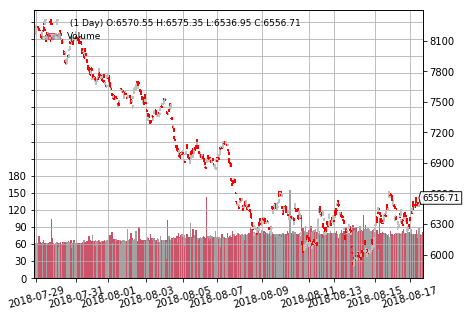


Final Portfolio Value: 64794.00


In [30]:
import argparse
import backtrader as bt
import backtrader.feeds as btfeeds

import pyfolio as pf

# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.data_signal = self.datas[0].openinterest

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.data.close[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return
       
        # Not yet ... we MIGHT BUY if ...
        if self.data_signal[0] >0:
            # buy sginal

            # BUY, BUY, BUY!!! (with default parameters)
            self.log('BUY CREATE, %.2f' % self.dataclose[0])

            # Keep track of the created order to avoid a 2nd order
            self.order = self.buy()

        elif self.data_signal[0] <0:
            # SELL, SELL, SELL!!! (with all possible default parameters)
            self.log('SELL CREATE, %.2f' % self.dataclose[0])

            # Keep track of the created order to avoid a 2nd order
            self.order = self.sell()

# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)

# Add a strategy
# Pass it to the backtrader datafeed and add it to the cerebro
bt_data = bt.feeds.PandasData(dataname=data)

cerebro.adddata(bt_data)

# Add a strategy
cerebro.addstrategy(TestStrategy)

# Set our desired cash start
cerebro.broker.setcash(50000.0)

cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

 
 
results = cerebro.run()
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')

returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
print('-- RETURNS')
print(returns)
print('-- POSITIONS')
print(positions)
print('-- TRANSACTIONS')
print(transactions)
print('-- GROSS LEVERAGE')
print(gross_lev)

cerebro.plot(style='bar')
print()
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

In [ ]:
print(bt_data)